In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy.spatial.distance import minkowski as mink
from scipy.spatial.distance import canberra as canb
from scipy.spatial.distance import russellrao as rusr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [102]:
df = pd.read_csv('kidney_disease.csv')
df  = df.drop(['id'],axis=1)

In [103]:
real = ['sc','pot','hemo','rc','sg']
integer = ['age','bp','bgr','bu','sod','pcv','wc','su','al']
label = ['classification']
binary = list(set(df.columns) - set(real)-set(integer)-set(label))
binary

['pc', 'ane', 'rbc', 'cad', 'dm', 'htn', 'pe', 'pcc', 'appet', 'ba']

In [104]:
df = df.replace('\t?',np.nan)
df = df.replace('\tyes','yes')
df = df.replace(' yes','yes')
df = df.replace('yes\t','yes')
df = df.replace('\tno','no')
df = df.replace('ckd\t','ckd')
df = df.replace('ckd',1)
df = df.replace('notckd',0)
# df = df.replace("normal",0)
# df = df.replace("abnormal",1)
# df = df.replace("notpresent",0)
# df = df.replace("present",1)
# df = df.replace("good",0)
# df = df.replace("bad",1)
# df = df.replace("yes",1)
# df = df.replace("no",0)

In [105]:
for r in real:
    mean = np.array(df[r][~df[r].isna()]).astype('float').mean()
    df[r] = df[r].fillna(mean)
for i in integer:
    mean = np.array(df[i][~df[i].isna()]).astype('int').mean()
    df[i] = df[i].fillna(int(mean))
df[binary]

,pc,ane,rbc,cad,dm,htn,pe,pcc,appet,ba
0,normal,no,NaN,no,yes,yes,no,notpresent,good,notpresent
1,normal,no,NaN,no,no,no,no,notpresent,good,notpresent
2,normal,yes,normal,no,yes,no,no,notpresent,poor,notpresent
3,abnormal,yes,normal,no,no,yes,yes,present,poor,notpresent
4,normal,no,normal,no,no,no,no,notpresent,good,notpresent
...,...,...,...,...,...,...,...,...,...,...
395,normal,no,normal,no,no,no,no,notpresent,good,notpresent
396,normal,no,normal,no,no,no,no,notpresent,good,notpresent
397,normal,no,normal,no,no,no,no,notpresent,good,notpresent
398,normal,no,normal,no,no,no,no,notpresent,good,notpresent


In [106]:
X = df.drop(label,axis=1)
Y = df[label]
binary = pd.get_dummies(df[binary])
binary

,pc_abnormal,pc_normal,ane_no,ane_yes,rbc_abnormal,rbc_normal,cad_no,cad_yes,dm_no,dm_yes,htn_no,htn_yes,pe_no,pe_yes,pcc_notpresent,pcc_present,appet_good,appet_poor,ba_notpresent,ba_present
0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0
3,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0
4,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
396,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
397,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
398,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [107]:
df[integer]

,age,bp,bgr,bu,sod,pcv,wc,su,al
0,48.0,80.0,121.0,36.0,137.0,44,7800,0.0,1.0
1,7.0,50.0,148.0,18.0,137.0,38,6000,0.0,4.0
2,62.0,80.0,423.0,53.0,137.0,31,7500,3.0,2.0
3,48.0,70.0,117.0,56.0,111.0,32,6700,0.0,4.0
4,51.0,80.0,106.0,26.0,137.0,35,7300,0.0,2.0
...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,150.0,47,6700,0.0,0.0
396,42.0,70.0,75.0,31.0,141.0,54,7800,0.0,0.0
397,12.0,80.0,100.0,26.0,137.0,49,6600,0.0,0.0
398,17.0,60.0,114.0,50.0,135.0,51,7200,0.0,0.0


In [108]:
new=pd.DataFrame()
new1=X[real].copy()
new2=X[integer].copy()
new3=binary.copy()
X=pd.concat([new1,new2,new3],axis=1)
X

,sc,pot,hemo,rc,sg,age,bp,bgr,bu,sod,...,htn_no,htn_yes,pe_no,pe_yes,pcc_notpresent,pcc_present,appet_good,appet_poor,ba_notpresent,ba_present
0,1.2,4.627244,15.4,5.2,1.020,48.0,80.0,121.0,36.0,137.0,...,0,1,1,0,1,0,1,0,1,0
1,0.8,4.627244,11.3,4.707435,1.020,7.0,50.0,148.0,18.0,137.0,...,1,0,1,0,1,0,1,0,1,0
2,1.8,4.627244,9.6,4.707435,1.010,62.0,80.0,423.0,53.0,137.0,...,1,0,1,0,1,0,0,1,1,0
3,3.8,2.500000,11.2,3.9,1.005,48.0,70.0,117.0,56.0,111.0,...,0,1,0,1,0,1,0,1,1,0
4,1.4,4.627244,11.6,4.6,1.010,51.0,80.0,106.0,26.0,137.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.5,4.900000,15.7,4.9,1.020,55.0,80.0,140.0,49.0,150.0,...,1,0,1,0,1,0,1,0,1,0
396,1.2,3.500000,16.5,6.2,1.025,42.0,70.0,75.0,31.0,141.0,...,1,0,1,0,1,0,1,0,1,0
397,0.6,4.400000,15.8,5.4,1.020,12.0,80.0,100.0,26.0,137.0,...,1,0,1,0,1,0,1,0,1,0
398,1.0,4.900000,14.2,5.9,1.025,17.0,60.0,114.0,50.0,135.0,...,1,0,1,0,1,0,1,0,1,0


In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/3, random_state = 76)

In [110]:
def mydist(u,v):
    distance = mink(u[:len(real)],v[:len(real)])+canb(u[len(real):len(real)+len(integer)],v[len(real):len(real)+len(integer)])+rusr(u[len(real)+len(integer):len(u)],v[len(real)+len(integer):len(u)])
    return distance

In [111]:
clf = KNeighborsClassifier(metric=mydist)
clf.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier(metric=<function mydist at 0x15502b760>)

In [112]:
X_train

,sc,pot,hemo,rc,sg,age,bp,bgr,bu,sod,...,htn_no,htn_yes,pe_no,pe_yes,pcc_notpresent,pcc_present,appet_good,appet_poor,ba_notpresent,ba_present
21,76.000000,4.627244,10.9,3.6,1.017408,60.0,90.0,148.0,180.0,4.5,...,0,1,1,0,1,0,1,0,1,0
322,0.500000,4.600000,16.0,4.9,1.017408,70.0,60.0,120.0,40.0,140.0,...,1,0,1,0,1,0,1,0,1,0
207,2.200000,4.627244,12.0,4.6,1.010000,50.0,70.0,230.0,50.0,137.0,...,0,1,1,0,1,0,1,0,1,0
48,0.900000,4.000000,10.0,3.5,1.005000,73.0,70.0,70.0,32.0,125.0,...,0,1,0,1,1,0,1,0,1,0
366,0.500000,3.600000,15.0,5.3,1.025000,60.0,80.0,81.0,15.0,141.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,1.000000,4.200000,9.7,4.5,1.010000,47.0,100.0,204.0,29.0,139.0,...,0,1,1,0,1,0,1,0,1,0
282,1.000000,3.800000,14.6,4.8,1.020000,20.0,70.0,123.0,44.0,135.0,...,1,0,1,0,1,0,1,0,1,0
384,1.100000,4.700000,15.4,4.5,1.020000,57.0,60.0,132.0,18.0,150.0,...,1,0,1,0,1,0,1,0,1,0
391,1.100000,4.100000,15.6,6.3,1.025000,36.0,80.0,85.0,16.0,142.0,...,1,0,1,0,1,0,1,0,1,0


In [113]:
Y_train

,classification
21,1
322,0
207,1
48,1
366,0
...,...
42,1
282,0
384,0
391,0


In [114]:
x_axis = []
y_axis = []
for i in range(1, 10, 2):
    clf = KNeighborsClassifier(metric=mydist,n_neighbors = i)
    score = cross_val_score(clf, X_train, np.ravel(Y_train),cv = KFold(3))
    x_axis.append(i)
    y_axis.append(score.mean())

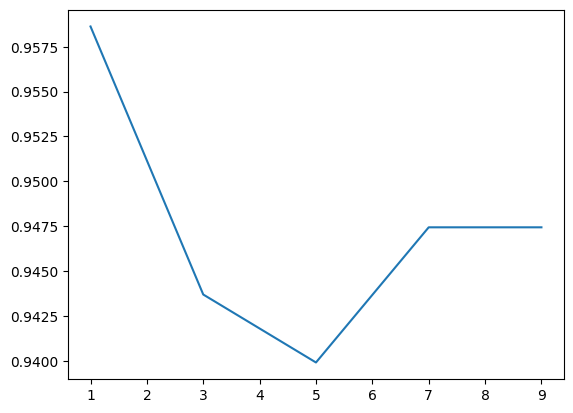

In [115]:
plt.plot(x_axis, y_axis)
plt.show()

In [116]:
clf = KNeighborsClassifier(metric=mydist,n_neighbors = 5)
X_train1, X_valid, Y_train1, Y_valid=train_test_split(X_train,Y_train, test_size = 1/2, random_state = 0)
clf.fit(X_train1,np.ravel(Y_train1))
a=clf.score(X_test,Y_test)
a

0.9328358208955224

In [119]:
clf = KNeighborsClassifier(metric=mydist,n_neighbors = 7)
clf.fit(X_train1,np.ravel(Y_train1))
b=clf.score(X_test,Y_test)
b

0.9328358208955224